# ECC

Source: https://www.youtube.com/watch?v=jQLmaBjYrk4&list=PLIS-R80eiu1s9I0V-evvo8NZMHLvNOQxh&index=3

## Constants

## Pcurve: The Proven Prime

`Pcurve` is a large prime number used in elliptic curve cryptography (ECC). It is defined as:

`Pcurve = 2^{256} - 2^{32} - 2^9 - 2^8 - 2^7 - 2^6 - 2^4 - 1`

This specific prime number is known as the secp256k1 curve's prime, which is widely used in cryptographic applications, including Bitcoin and other blockchain technologies. The secp256k1 curve is chosen for its security properties and efficiency in cryptographic operations.

In HEX

In [2]:
Pcurve = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F # The proven prime
Pcurve

115792089237316195423570985008687907853269984665640564039457584007908834671663

In [3]:
# 32 bytes long
len('FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEFFFFFC2F')

64

Same number derived from exponents.

In [4]:
Pcurve = 2**256 - 2**32 - 2**9 - 2**8 - 2**7 - 2**6 - 2**4 - 1 # The proven prime
Pcurve

115792089237316195423570985008687907853269984665640564039457584007908834671663

In [5]:
x = 0xFF
len(hex(x)[2:])

2

## N

`N` is the order of the elliptic curve, which represents the number of points on the curve. It is used in elliptic curve cryptography (ECC) to define the range of valid private keys and to ensure the security of cryptographic operations.

No, `N` and `Pcurve` are not the same. They have different values:

- `N` = 115792089237316195423570985008687907852837564279074904382605163141518161494337
- `Pcurve` = 115792089237316195423570985008687907853269984665640564039457584007908834671663

The number of points on the elliptic curve is calculated using the formula for the order of the curve, which involves complex mathematical operations based on the curve's parameters. The order `N` is a predefined constant for the secp256k1 curve, ensuring the security and efficiency of cryptographic operations.

`N` and `Pcurve` are constants used in Bitcoin's elliptic curve cryptography.

In [6]:
N = 0xFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFEBAAEDCE6AF48A03BBFD25E8CD0364141 # Number of points in the field
N

115792089237316195423570985008687907852837564279074904382605163141518161494337

### Number of Private Keys in Bitcoin

In Bitcoin's elliptic curve cryptography (ECC), the variable `N` represents the order of the elliptic curve. The order of the curve is a crucial parameter that defines the total number of valid points (or keys) on the elliptic curve. Specifically, `N` is the number of points on the secp256k1 curve, which is the elliptic curve used by Bitcoin.

The value of `N` is:

`N = 115792089237316195423570985008687907852837564279074904382605163141518161494337`

This large number essentially determines the range of possible private keys in Bitcoin. Each private key is a randomly chosen integer between 1 and `N-1`. The vast size of `N` ensures that the probability of generating the same private key twice is extremely low, providing a high level of security.

In summary, `N` defines the total number of possible private keys in Bitcoin, ensuring a vast and secure key space for cryptographic operations.

### Acurve / Bcurve
These two defines the elliptic curve. y^2 = x^3 + Acurve * x + Bcurve

In [7]:
Acurve = 0
Bcurve = 7

### GPoint: The Base Point of the Elliptic Curve

`GPoint` is a fundamental constant in elliptic curve cryptography (ECC). It represents the base point (also known as the generator point) on the elliptic curve. The base point is a predefined point on the curve used to generate all other points on the curve through scalar multiplication.

For the secp256k1 curve, which is widely used in cryptographic applications such as Bitcoin, the base point `GPoint` is defined by its x-coordinate (`Gx`) and y-coordinate (`Gy`):

- `Gx` = 55066263022277343669578718895168534326250603453777594175500187360389116729240
- `Gy` = 32670510020758816978083085130507043184471273380659243275938904335757337482424

These coordinates are constants and are part of the curve's domain parameters. The base point is crucial for cryptographic operations, as it ensures the security and efficiency of the ECC algorithm.

The tuple `GPoint` is defined as:
```python
GPoint = (Gx, Gy)
```

In summary, `GPoint` is the starting point for generating all other points on the elliptic curve, and its predefined coordinates are essential for the security of ECC-based cryptographic systems.

In [8]:
Gx = 0x79BE667EF9DCBBAC55A06295CE870B07029BFCDB2DCE28D959F2815B16F81798 # Gx
Gy = 0x483ADA7726A3C4655DA4FBFC0E1108A8FD17B448A68554199C47D08FFB10D4B8 # Gy
GPoint = (Gx, Gy) # The proven base point
GPoint

(55066263022277343669578718895168534326250603453777594175500187360389116729240,
 32670510020758816978083085130507043184471273380659243275938904335757337482424)

### Private Key
Any key can be used for this.

In [9]:
privKey = 0xA0DC65FFCA799873CBEA0AC274015B9526505DAAAED385155425F7337704883E
privKey

72759466100064397073952777052424474334519735946222029294952053344302920927294

## Functions

### `modinv`

The modulo inverse is a fundamental operation in number theory and cryptography, particularly in the context of elliptic curve cryptography (ECC). It finds an integer `x` such that `(a * x) % n == 1`. The function `modinv` implements the Extended Euclidean Algorithm to compute this inverse efficiently.

For example, if `a = 3` and `n = 11`, the modulo inverse of `3` modulo `11` is `4`, because `(3 * 4) % 11 == 1`.

`lm`, `hm`, and `nm` are variables used in the Extended Euclidean Algorithm to compute the modular inverse. Here's what they represent:

- `lm`: Low multiplier, which keeps track of the coefficient for the current remainder in the Euclidean algorithm.
- `hm`: High multiplier, which keeps track of the coefficient for the previous remainder in the Euclidean algorithm.
- `nm`: New multiplier, which is a temporary variable used to update `lm` and `hm` during the iteration.

These variables help in finding the coefficients that satisfy the equation `(a * x) % n == 1`.


In [10]:
def modinv(a, n=Pcurve): #Extended Euclidean Algorithm/'division' in elliptic curves
    lm, hm = 1,0
    low, high = a%n,n
    while low > 1:
        ratio = high//low
        nm, new = hm-lm*ratio, high-low*ratio
        lm, low, hm, high = nm, new, lm, low
    return lm % n

In [11]:
modinv(3, 11)

4

### `ECadd`

Basically does this.

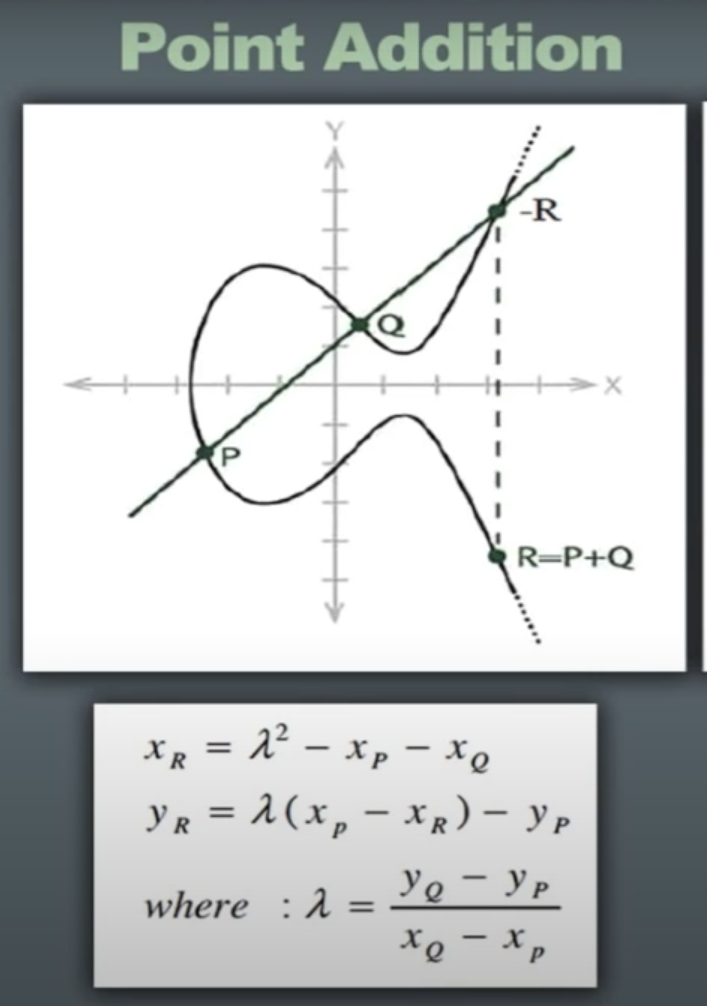

The word *addition* is actually confusing because it's not addition that's hapening. It's just finding the next point on the slope and getting the inverse.

In [12]:
def ECadd(a, b): # Not true addition, invented for EC. Could have been called anything.
    LamAdd = ((b[1]-a[1]) * modinv(b[0]-a[0],Pcurve)) % Pcurve
    x = (LamAdd*LamAdd-a[0]-b[0]) % Pcurve
    y = (LamAdd*(a[0]-x)-a[1]) % Pcurve
    return (x,y)

## `ECdouble`

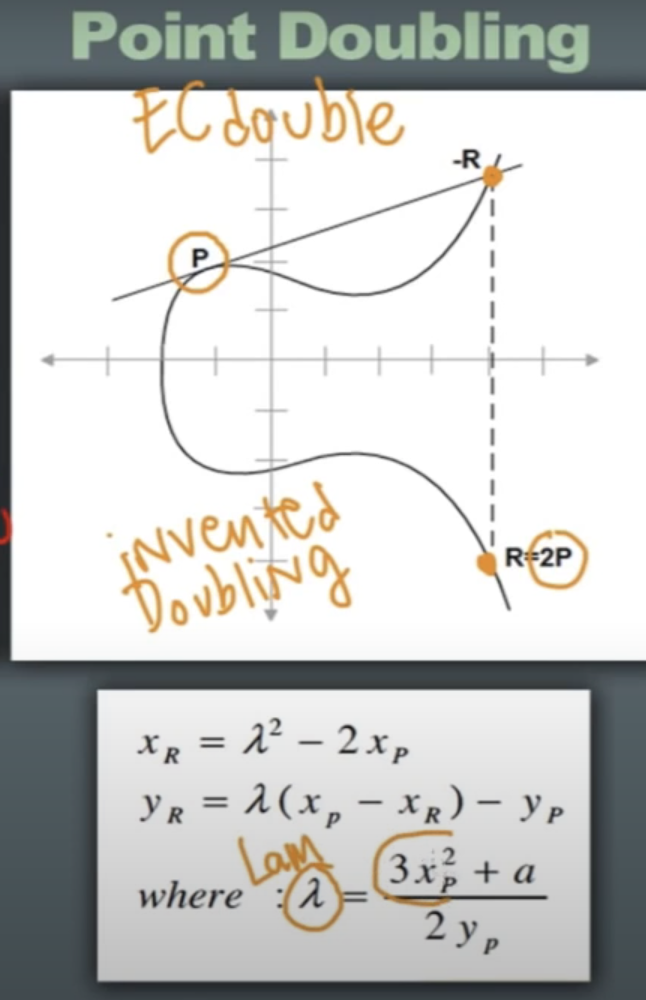

In [13]:
def ECdouble(a): # This is called point doubling, also invented for EC.
    Lam = ((3*a[0]*a[0]+Acurve) * modinv((2*a[1]),Pcurve)) % Pcurve
    x = (Lam*Lam-2*a[0]) % Pcurve
    y = (Lam*(a[0]-x)-a[1]) % Pcurve
    return (x,y)

### `EccMultiply`

The `EccMultiply` function takes a generator point (`GenPoint`) and a scalar (private key in hexadecimal format, `ScalarHex`) and performs elliptic curve point multiplication. This process involves doubling and adding points on the elliptic curve to derive the corresponding public key.

1. **Validation**: The function first checks if the scalar is valid (not zero and less than `N`).
2. **Conversion**: The scalar is converted to a binary string.
3. **Initialization**: The initial point `Q` is set to the generator point.
4. **Loop**: For each bit in the binary representation of the scalar (excluding the first bit):
    - The point `Q` is doubled.
    - If the bit is `1`, the generator point is added to `Q`.
5. **Result**: The resulting point `Q` is the public key corresponding to the given private key.

This process ensures that the private key is securely transformed into a public key using elliptic curve cryptographic operations.

In [14]:
def EccMultiply(GenPoint, ScalarHex): # Double & add. Not true multiplication
    if ScalarHex == 0 or ScalarHex >= N: 
        raise Exception("Invalid Scalar/Private Key") # Ensure the scalar is valid
    ScalarBin = str(bin(ScalarHex))[2:] # Convert scalar to binary string
    Q = GenPoint # Initialize Q to the generator point
    for i in range(1, len(ScalarBin)): # Loop through each bit in the binary representation
        Q = ECdouble(Q) # Double the point
        if ScalarBin[i] == '1': # If the bit is 1, add the generator point
            Q = ECadd(Q, GenPoint)
    return Q # Return the resulting point

In [15]:
EccMultiply(GPoint, privKey)

(3423904187495496827825042940737875085827330420143621346629173781207857376010,
 75711134420273723792089656449854389054866833762486990555172221523628676983696)

## Output

In [16]:
print('********** Public Key Generation **********')
print('Private Key: ', hex(privKey)[2:].upper())
PublicKey = EccMultiply(GPoint, privKey) # Start with G (generator) and multiply by the private key
print('Uncompressed Public Key:', PublicKey)

********** Public Key Generation **********
Private Key:  A0DC65FFCA799873CBEA0AC274015B9526505DAAAED385155425F7337704883E
Uncompressed Public Key: (3423904187495496827825042940737875085827330420143621346629173781207857376010, 75711134420273723792089656449854389054866833762486990555172221523628676983696)


### Why It's Not Possible to Derive the Private Key from the Uncompressed Public Key

In simple terms, here's why you can't figure out the private key just by knowing the public key in elliptic curve cryptography (ECC):

1. **Hard Math Problem**:
    - Imagine you have a magic point \( P \) and another point \( Q \) on a special curve. The challenge is to find a secret number \( k \) that, when multiplied by \( P \), gives you \( Q \).
    - This math problem is super hard to solve, especially when \( k \) is a big number.

2. **Too Many Possibilities**:
    - The secret number (private key) is a huge number, like a really long password.
    - There are so many possible numbers that guessing the right one would take forever.

3. **One-Way Street**:
    - Turning the secret number into a public key is like going down a one-way street. It's easy to go one way (private key to public key), but impossible to go back the other way (public key to private key).

4. **Safe Assumptions**:
    - The security of ECC is based on the idea that no one knows a quick way to solve this hard math problem.
    - So far, no one has found a way to solve it quickly, which keeps ECC safe.

In short, you can't figure out the private key from the public key because it's like trying to solve a super hard puzzle with too many pieces, and no one knows the trick to solve it quickly.


In [33]:
def compress_public_key(public_key):
    compressed_prefix = "020" if public_key[1] % 2 == 0 else "030"
    compressed_key = compressed_prefix + hex(public_key[0])[2:].upper()
    return compressed_key

In [35]:
PublicKey = EccMultiply(GPoint, privKey) # Start with G (generator) and multiply by the private key
compressed_key = compress_public_key(PublicKey)

print('********** Public Key Generation **********')
print('Private Key: ', hex(privKey)[2:].upper())
print('Uncompressed Public Key:', PublicKey)
print("Public Key — Compressed: " + compressed_key)

********** Public Key Generation **********
Private Key:  A0DC65FFCA799873CBEA0AC274015B9526505DAAAED385155425F7337704883E
Uncompressed Public Key: (3423904187495496827825042940737875085827330420143621346629173781207857376010, 75711134420273723792089656449854389054866833762486990555172221523628676983696)
Public Key — Compressed: 020791DC70B75AA995213244AD3F4886D74D61CCD3EF658243FCAD14C9CCEE2B0A


### Creating the Public Address
Going from private key to pubic key with ECDSA is the most important step. Here's the transforamtion into an address.

In [36]:
import hashlib

def sha256(data):
    return hashlib.sha256(data).digest()

def ripemd160(data):
    h = hashlib.new('ripemd160')
    h.update(data)
    return h.digest()

def base58_encode(data):
    alphabet = '123456789ABCDEFGHJKLMNPQRSTUVWXYZabcdefghijkmnopqrstuvwxyz'
    num = int.from_bytes(data, 'big')
    encode = ''
    while num > 0:
        num, rem = divmod(num, 58)
        encode = alphabet[rem] + encode
    return encode

def public_key_to_address(public_key):
    # Step 1: Perform SHA-256 hashing on the public key
    sha256_result = sha256(bytes.fromhex(public_key))
    
    # Step 2: Perform RIPEMD-160 hashing on the result of SHA-256
    ripemd160_result = ripemd160(sha256_result)
    
    # Step 3: Add version byte in front of RIPEMD-160 hash (0x00 for Main Network)
    versioned_payload = b'\x00' + ripemd160_result
    
    # Step 4: Perform SHA-256 hash on the extended RIPEMD-160 result
    sha256_2_result = sha256(versioned_payload)
    
    # Step 5: Perform SHA-256 hash on the result of the previous SHA-256 hash
    sha256_3_result = sha256(sha256_2_result)
    
    # Step 6: Take the first 4 bytes of the second SHA-256 hash. This is the address checksum
    checksum = sha256_3_result[:4]
    
    # Step 7: Add the 4 checksum bytes from step 6 at the end of the extended RIPEMD-160 hash from step 3
    binary_address = versioned_payload + checksum
    
    # Step 8: Convert the result from a byte string into a base58 string using Base58Check encoding
    address = base58_encode(binary_address)
    
    return address

# Convert the compressed public key to an address
address = public_key_to_address(compressed_key)
print("Bitcoin Address:", address)

Bitcoin Address: 7ZYZASydeA1xyfNrcYcLyqghmK3eGJpHq


No, it is not possible to derive the public key from the Bitcoin address. The Bitcoin address is a hashed and encoded version of the public key, which means that the original public key information is not directly accessible from the address. The process of generating a Bitcoin address from a public key involves multiple hashing steps (SHA-256 and RIPEMD-160) and encoding (Base58Check), making it a one-way function.

People can find out your public key through the following process:

1. **Transaction**: When you make a transaction, your public key is included in the transaction data. This is necessary for the network to verify that you have the right to spend the funds.

2. **Signature Verification**: The public key is used to verify the digital signature that you create with your private key. This ensures that the transaction is valid and was indeed created by you.

3. **Blockchain**: Once the transaction is broadcasted to the network and included in a block, your public key becomes part of the public ledger (blockchain). Anyone can view the blockchain and see your public key associated with the transaction.

In summary, your public key is revealed when you make a transaction and it gets included in the blockchain. This allows others to verify the authenticity of your transactions.

## Can Quantum Computers Crack ECC?

Right now, no. But in the future? Maybe—if quantum computers improve a lot.

### Why Would Quantum Computers Break ECC?

The security of ECC relies on a super hard math problem: the Elliptic Curve Discrete Logarithm Problem (ECDLP).

- Classical computers take forever to solve this.
- But Shor’s Algorithm, running on a powerful enough quantum computer, can solve it instantly.

### How Big Would a Quantum Computer Need to Be?

Scientists estimate you’d need about 1 million stable, error-corrected qubits to break ECC-256 (the kind Bitcoin uses).

For comparison:

- The biggest quantum computer today (IBM, Google, etc.) has around 1,000 noisy qubits—not even close.
- We need not just more qubits but also error correction (because quantum computers are super unstable).

### How Long Until This Happens?

Experts debate this, but most say at least 15–30 years—if it even happens.

- Some say it might never happen due to hardware challenges.
- Others think breakthroughs in physics might speed things up.

### What Happens If ECC is Broken?

If someone builds a quantum computer that can run Shor’s Algorithm at scale:

- Bitcoin private keys can be cracked—your funds could be stolen.
- All ECC-based encryption (banking, HTTPS, etc.) becomes unsafe.
- The world would need to switch to quantum-resistant cryptography (like lattice-based encryption) ASAP.

### Can Bitcoin Survive This?

Yes! Bitcoin can upgrade to quantum-resistant cryptography before it’s a problem. Developers are already researching alternatives (like lattice-based signatures).

### Final Verdict:

- Right now? Bitcoin is safe.
- In 20–30 years? Maybe risky, but Bitcoin can adapt before that.
- Quantum computers today? Not even close to breaking ECC.

So no need to panic—but it’s something to watch. 🚀

---

### Difficulty of Changing Bitcoin’s Cryptography (1-10)

Assuming instant consensus from the network (which is the hardest part in reality), I’d rate the difficulty of switching from ECC to a quantum-resistant algorithm as a 6 or 7 out of 10.

#### Why Not a 10?

It’s not impossible because:

- Bitcoin’s cryptography is modular – You can swap ECC for another signing algorithm in the code.
- Soft forks are possible – Bitcoin has already upgraded cryptographic rules in the past.
- Quantum-resistant algorithms already exist – Lattice-based cryptography (like CRYSTALS-Dilithium) is a strong candidate.

#### Why Not a 1?

It’s still very hard because:

- Backward compatibility is tricky – Old private keys use ECC. Do we force users to move funds? How?
- Signature size increases – Quantum-resistant signatures are way bigger than ECC ones, meaning:
    - Transactions take up more space.
    - Fees could rise.
    - Blocks might need adjustments.
- Security risks during the transition – Attackers might exploit old keys before users migrate.
- It requires a hard fork if done suddenly – If not everyone upgrades, we risk splitting Bitcoin into two chains.

#### How Would It Be Done?

1. Introduce quantum-resistant addresses alongside ECC addresses (soft fork).
2. Let users voluntarily move funds to new, safer addresses.
3. Encourage wallets/exchanges to support it.
4. Gradually phase out ECC-based transactions over time.
5. Set a deadline for migration (e.g., 10 years).
6. After the deadline, old keys are invalid.
7. If quantum computers become urgent, hard fork to force the change.

### Final Score: 6-7/10

If we had instant consensus, it would be a software engineering challenge, not an existential crisis. The real challenge is social coordination—convincing miners, node operators, and users to upgrade. Bitcoin is adaptable—the network can upgrade before quantum computers become a threat.

So not trivial, but totally doable. 🚀